# extract data

In [4]:
import json
import numpy as np
from typing import Dict, List, Tuple

def load_json_data(file_path: str) -> dict:
    """加载JSON文件数据"""
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

def extract_robot_data(data: dict) -> Dict[str, Dict[str, np.ndarray]]:
    """
    提取每个机器人的pred_curve和states数据
    
    Args:
        data: JSON数据字典
        
    Returns:
        包含每个机器人数据的字典，格式为:
        {
            'robot_id': {
                'pred_curve': np.ndarray,  # 形状为 (time_steps, num_points, 3)
                'states': np.ndarray       # 形状为 (time_steps, 6)
            }
        }
    """
    robots_data = {}
    
    if 'robots' not in data:
        print("警告: 未找到robots数据")
        return robots_data
    
    for robot_id, robot_info in data['robots'].items():
        print(f"正在处理机器人 {robot_id}...")
        
        robot_data = {}
        
        # 提取pred_curve数据
        if 'pred_curve' in robot_info:
            pred_curve = robot_info['pred_curve']
            # 转换为numpy array，形状为 (time_steps, num_points, 3)
            pred_curve_array = np.array(pred_curve, dtype=np.float64)
            robot_data['pred_curve'] = pred_curve_array
            print(f"  机器人 {robot_id} pred_curve 形状: {pred_curve_array.shape}")
        else:
            print(f"  警告: 机器人 {robot_id} 没有pred_curve数据")
            robot_data['pred_curve'] = np.array([])
        
        # 提取states数据
        if 'states' in robot_info:
            states = robot_info['states']
            # 转换为numpy array，形状为 (time_steps, 6)
            states_array = np.array(states, dtype=np.float64)
            robot_data['states'] = states_array
            print(f"  机器人 {robot_id} states 形状: {states_array.shape}")
        else:
            print(f"  警告: 机器人 {robot_id} 没有states数据")
            robot_data['states'] = np.array([])
        
        robots_data[robot_id] = robot_data
    
    return robots_data

def print_data_summary(robots_data: Dict[str, Dict[str, np.ndarray]]):
    """打印数据摘要"""
    print("\n" + "="*50)
    print("数据提取完成！")
    print("="*50)
    
    for robot_id, robot_data in robots_data.items():
        print(f"\n机器人 {robot_id}:")
        
        pred_curve = robot_data['pred_curve']
        if pred_curve.size > 0:
            print(f"  pred_curve: 形状 {pred_curve.shape}")
            print(f"    数据类型: {pred_curve.dtype}")
            print(f"    数据范围: X[{pred_curve[:, :, 0].min():.4f}, {pred_curve[:, :, 0].max():.4f}]")
            print(f"              Y[{pred_curve[:, :, 1].min():.4f}, {pred_curve[:, :, 1].max():.4f}]")
            print(f"              Z[{pred_curve[:, :, 2].min():.4f}, {pred_curve[:, :, 2].max():.4f}]")
        else:
            print("  pred_curve: 无数据")
        
        states = robot_data['states']
        if states.size > 0:
            print(f"  states: 形状 {states.shape}")
            print(f"    数据类型: {states.dtype}")
            print(f"    数据范围: 位置[{states[:, :3].min():.4f}, {states[:, :3].max():.4f}]")
            print(f"             速度[{states[:, 3:].min():.4f}, {states[:, 3:].max():.4f}]")
        else:
            print("  states: 无数据")

def save_data_to_npz(robots_data: Dict[str, Dict[str, np.ndarray]], output_file: str = "robot_data.npz"):
    """将数据保存为.npz文件"""
    save_dict = {}
    
    for robot_id, robot_data in robots_data.items():
        if robot_data['pred_curve'].size > 0:
            save_dict[f'robot_{robot_id}_pred_curve'] = robot_data['pred_curve']
        if robot_data['states'].size > 0:
            save_dict[f'robot_{robot_id}_states'] = robot_data['states']
    
    np.savez(output_file, **save_dict)
    print(f"\n数据已保存到 {output_file}")

def main():
    """主函数"""
    # 加载JSON数据
    json_file = "result.json"
    print(f"正在加载JSON文件: {json_file}")
    
    try:
        data = load_json_data(json_file)
        print("JSON文件加载成功！")
    except Exception as e:
        print(f"加载JSON文件失败: {e}")
        return
    
    # 提取机器人数据
    robots_data = extract_robot_data(data)
    
    if not robots_data:
        print("未找到任何机器人数据")
        return
    
    # 打印数据摘要
    print_data_summary(robots_data)
    
    # 保存数据到.npz文件
    save_data_to_npz(robots_data)
    
    # 返回数据供进一步使用
    return robots_data

if __name__ == "__main__":
    robots_data = main()
    
    # 示例：如何访问特定机器人的数据
    if robots_data:
        print("\n" + "="*50)
        print("数据访问示例:")
        print("="*50)
        
        for robot_id in robots_data.keys():
            print(f"\n访问机器人 {robot_id} 的数据:")
            
            # 获取pred_curve数据
            pred_curve = robots_data[robot_id]['pred_curve']
            if pred_curve.size > 0:
                print(f"  pred_curve[0, 0, :] = {pred_curve[0, 0, :]}")  # 第一个时间步，第一个点
                print(f"  pred_curve[-1, -1, :] = {pred_curve[-1, -1, :]}")  # 最后一个时间步，最后一个点
            
            # 获取states数据
            states = robots_data[robot_id]['states']
            if states.size > 0:
                print(f"  states[0, :] = {states[0, :]}")  # 第一个时间步的状态
                print(f"  states[-1, :] = {states[-1, :]}")  # 最后一个时间步的状态


正在加载JSON文件: result.json
JSON文件加载成功！
正在处理机器人 0...
  机器人 0 pred_curve 形状: (51, 1, 30, 3)
  机器人 0 states 形状: (510, 6)
正在处理机器人 1...
  机器人 1 pred_curve 形状: (51, 1, 30, 3)
  机器人 1 states 形状: (510, 6)
正在处理机器人 2...
  机器人 2 pred_curve 形状: (51, 1, 30, 3)
  机器人 2 states 形状: (510, 6)

数据提取完成！

机器人 0:
  pred_curve: 形状 (51, 1, 30, 3)
    数据类型: float64
    数据范围: X[-0.5104, 2.0000]
              Y[-0.5091, 1.9938]
              Z[-0.5098, 1.9757]
  states: 形状 (510, 6)
    数据类型: float64
    数据范围: 位置[-0.5118, 2.0001]
             速度[-1.6648, 1.1046]

机器人 1:
  pred_curve: 形状 (51, 1, 30, 3)
    数据类型: float64
    数据范围: X[0.2670, 6.0000]
              Y[0.2726, 5.9954]
              Z[0.2683, 5.9818]
  states: 形状 (510, 6)
    数据类型: float64
    数据范围: 位置[0.2667, 6.0004]
             速度[-1.9207, 1.1319]

机器人 2:
  pred_curve: 形状 (51, 1, 30, 3)
    数据类型: float64
    数据范围: X[-3.0000, 6.0000]
              Y[-2.9954, 5.9950]
              Z[-2.9820, 5.9801]
  states: 形状 (510, 6)
    数据类型: float64
    数据范围: 位置[-3.0

# plot and save

/var/folders/lq/46s23p8j48dbmg1xby18qhqc0000gn/T/ipykernel_12253/1298797627.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_blue  = cm.get_cmap("Blues")
/var/folders/lq/46s23p8j48dbmg1xby18qhqc0000gn/T/ipykernel_12253/1298797627.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_red   = cm.get_cmap("Reds")
/var/folders/lq/46s23p8j48dbmg1xby18qhqc0000gn/T/ipykernel_12253/1298797627.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_green = cm.get_cmap("G

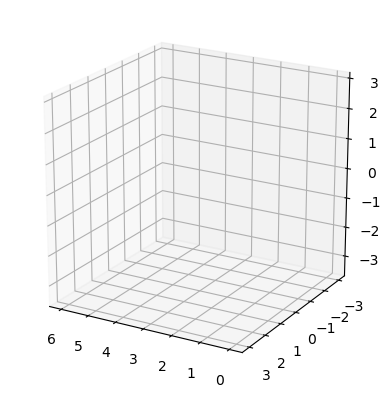

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# ---------- 小球绘制 ----------
def plot_sphere(ax, x0, y0, z0, r, alpha=0.2, color=(0.5,0.5,1,1), nu=24, nv=12):
    u = np.linspace(0, 2*np.pi, nu)
    v = np.linspace(0, np.pi, nv)
    x = x0 + r * np.outer(np.cos(u), np.sin(v))
    y = y0 + r * np.outer(np.sin(u), np.sin(v))
    z = z0 + r * np.outer(np.ones_like(u), np.cos(v))
    ax.plot_surface(x, y, z, color=color, alpha=alpha, edgecolor=None, linewidth=0)

def set_axes_equal(ax):
    """让 3D 轴比例一致"""
    xs, ys, zs = ax.get_xlim3d(), ax.get_ylim3d(), ax.get_zlim3d()
    xmid, ymid, zmid = np.mean(xs), np.mean(ys), np.mean(zs)
    r = max(xs[1]-xs[0], ys[1]-ys[0], zs[1]-zs[0]) * 0.5
    ax.set_xlim3d(xmid-r, xmid+r)
    ax.set_ylim3d(ymid-r, ymid+r)
    ax.set_zlim3d(zmid-r, zmid+r)

# ---------- 加载数据 ----------
data = np.load('robot_data.npz')

totRobotNum = 3
radius_list = [0.2, 0.2, 0.2]

# 颜色：前(深) / 后(浅)
cmap_blue  = cm.get_cmap("Blues")
cmap_red   = cm.get_cmap("Reds")
cmap_green = cm.get_cmap("Greens")
color_before_list = [cmap_blue(0.5),  cmap_red(0.5),  cmap_green(0.9)]
color_after_list  = [cmap_blue(0.9),  cmap_red(0.9),  cmap_green(0.5)]

# 预取每个机器人的数据与比例
robot_states  = []
robot_preds   = []
ratios        = []
max_frames    = []
for i in range(totRobotNum):
    name_state = f'robot_{i}_states'
    name_pred  = f'robot_{i}_pred_curve'
    S = data[name_state]                 # (T_state, >=3)
    P = data[name_pred]                  # (T_pred, 1, 30, 3) 之类
    line = S[:, :3]
    T_pred = P.shape[0]
    T_state = S.shape[0]
    ratio = int(T_state / T_pred) if T_pred > 0 else 1
    robot_states.append(line)
    robot_preds.append(P)
    ratios.append(ratio)
    max_frames.append(T_pred)  # 用预测长度驱动帧数

# 动画总帧数（统一取所有机器人的最小预测长度）
frames = int(min(max_frames))

# ---------- 画布 ----------
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 为了固定视角与坐标范围，先用一次性绘图确定范围（也可以手动设置）
for i in range(totRobotNum):
    line = robot_states[i]
    ax.plot(line[:,0], line[:,1], line[:,2], alpha=0)  # 隐形引导范围
set_axes_equal(ax)
init_xlim, init_ylim, init_zlim = ax.get_xlim3d(), ax.get_ylim3d(), ax.get_zlim3d()

# ---------- 动画回调 ----------
def init():
    ax.cla()
    ax.set_xlim3d(init_xlim)
    ax.set_ylim3d(init_ylim)
    ax.set_zlim3d(init_zlim)
    ax.set_box_aspect([1,1,1])
    ax.view_init(elev=20, azim=120)
    return []

def animate(frame):
    ax.cla()
    # 固定轴范围与视角（避免自动缩放抖动）
    ax.set_xlim3d(init_xlim)
    ax.set_ylim3d(init_ylim)
    ax.set_zlim3d(init_zlim)
    ax.set_box_aspect([1,1,1])
    ax.view_init(elev=20, azim=120)

    # 每个机器人绘制
    for i in range(totRobotNum):
        line   = robot_states[i]
        P      = robot_preds[i]
        ratio  = ratios[i]
        r_sph  = radius_list[i]
        c_bef  = color_before_list[i]
        c_aft  = color_after_list[i]

        # 当前 point_num = frame
        point_num = frame
        # 转换到 state 索引
        idx = min(point_num * max(ratio,1), line.shape[0]-1)

        # 当前点
        ax.scatter(line[idx,0], line[idx,1], line[idx,2],
                   s=50, color=c_bef, marker='*')

        # 过去/未来轨迹
        before_line = line[:idx+1, :]
        after_line  = line[idx+1:, :]
        if before_line.shape[0] > 1:
            ax.plot(before_line[:,0], before_line[:,1], before_line[:,2],
                    linewidth=2, color=c_bef)
        if after_line.shape[0] > 1:
            ax.plot(after_line[:,0], after_line[:,1], after_line[:,2],
                    linewidth=2, color=c_aft, linestyle=(0,(2,10)))

        # 预测曲线（取该帧的预测 30×3）
        if P.shape[0] > point_num:
            predicted_line = P[point_num, 0, :, :]  # (30,3)
            ax.plot(predicted_line[:,0], predicted_line[:,1], predicted_line[:,2],
                    linewidth=3, ls=':', color=c_aft)

        # 小球：当前点 + 稀疏采样的轨迹球
        plot_sphere(ax, line[idx,0], line[idx,1], line[idx,2], r_sph, alpha=0.9, color=c_bef)
        # plot sphere for trajectory
        # step = 10
        # for p in before_line[::step]:
        #     plot_sphere(ax, p[0], p[1], p[2], r_sph, alpha=0.5, color=c_bef)
        # for p in after_line[::step]:
        #     plot_sphere(ax, p[0], p[1], p[2], r_sph, alpha=0.12, color=c_aft)

    # 图例（示意）
    # 注意：频繁调用 legend 可能略慢，如需更快可去掉或固定一次性绘制
    # ax.legend(loc='upper right')

    return []

ani = animation.FuncAnimation(
    fig, animate, init_func=init,
    frames=frames, interval=120, blit=False
)


# 如需保存：
# ani.save('robots.mp4', fps=10, dpi=120)   # 需要安装 ffmpeg
ani.save('robots.gif', fps=10, dpi=80)    # 需要 pillow